In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
car_details = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
#print 1st five rows
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#checking basic information about the dataset
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
#checking for missing values
car_details.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
#checking duplicate values
car_details.duplicated().sum()

763

In [7]:
#dropping duplicate values
car_details.drop_duplicates(inplace=True)

In [8]:
car_details.duplicated().sum()

0

In [9]:
#display summary statistics
car_details.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


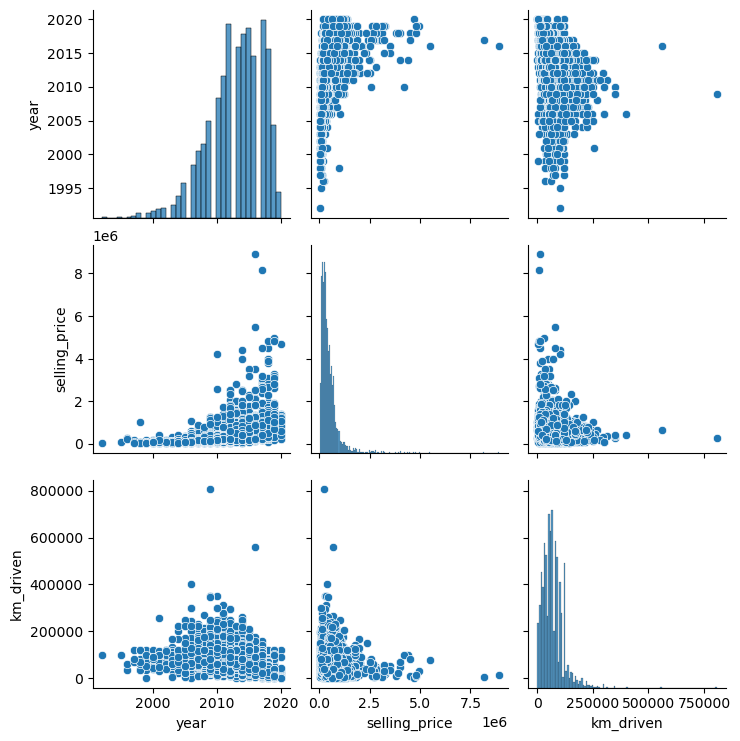

In [10]:
#visualizing the distribution of numerical features
sns.pairplot(car_details)
plt.show()

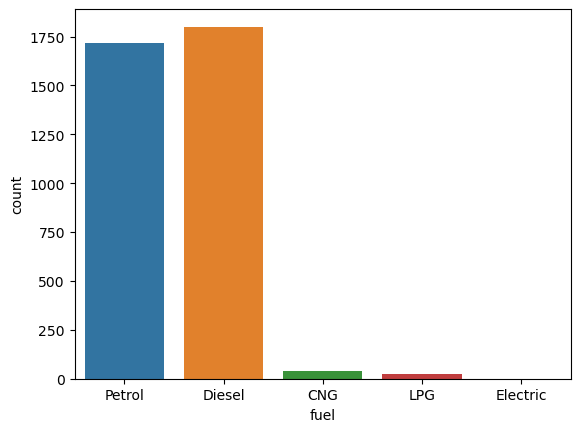

In [11]:
#checking the distribution of categorical features
sns.countplot(x = "fuel", data = car_details)
plt.show()

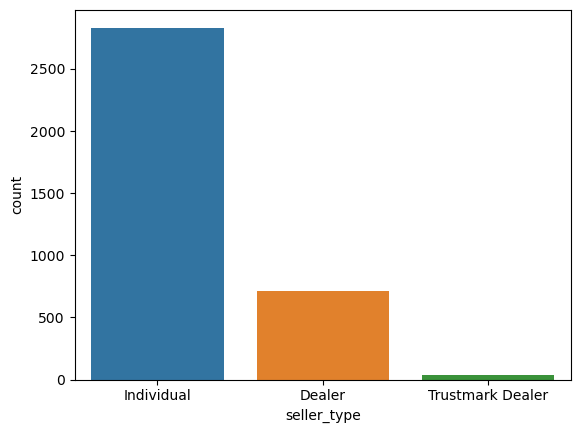

In [12]:
sns.countplot(x = "seller_type", data = car_details)
plt.show()

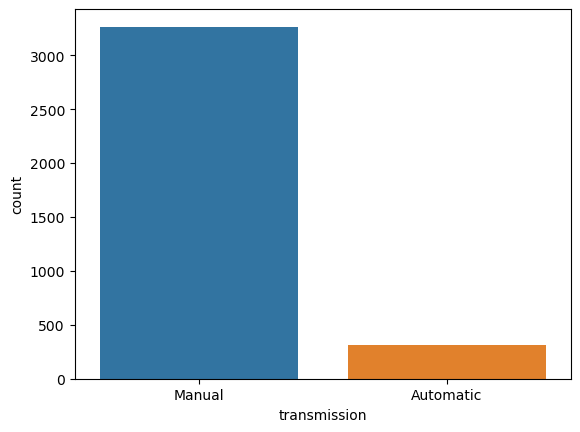

In [13]:
sns.countplot(x = "transmission", data = car_details)
plt.show()

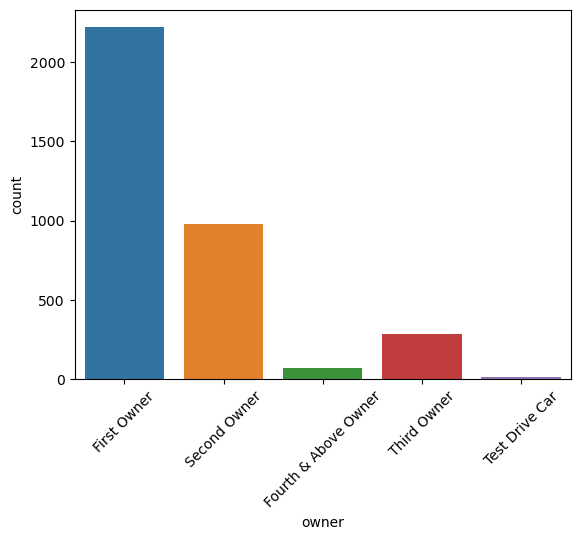

In [14]:
sns.countplot(x = "owner", data = car_details)
plt.xticks(rotation = 45)
plt.show()

In [15]:
#extracting car brand from the 'name' column
car_details["brand"] = car_details["name"].apply(lambda x: x.split()[0])

In [16]:
#creating a new column for the number of years the car has been used
current_year = pd.to_datetime("today").year
car_details["years_used"] = current_year - car_details["year"]

In [17]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,years_used
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,10


In [18]:
#dropping unnecessary columns
car_details = car_details.drop(["name", "year"], axis = 1)

In [19]:
#encoding categorical variables
car_details = pd.get_dummies(car_details, drop_first = True)

In [20]:
car_details.head()

,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,70000,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,12,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,7,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


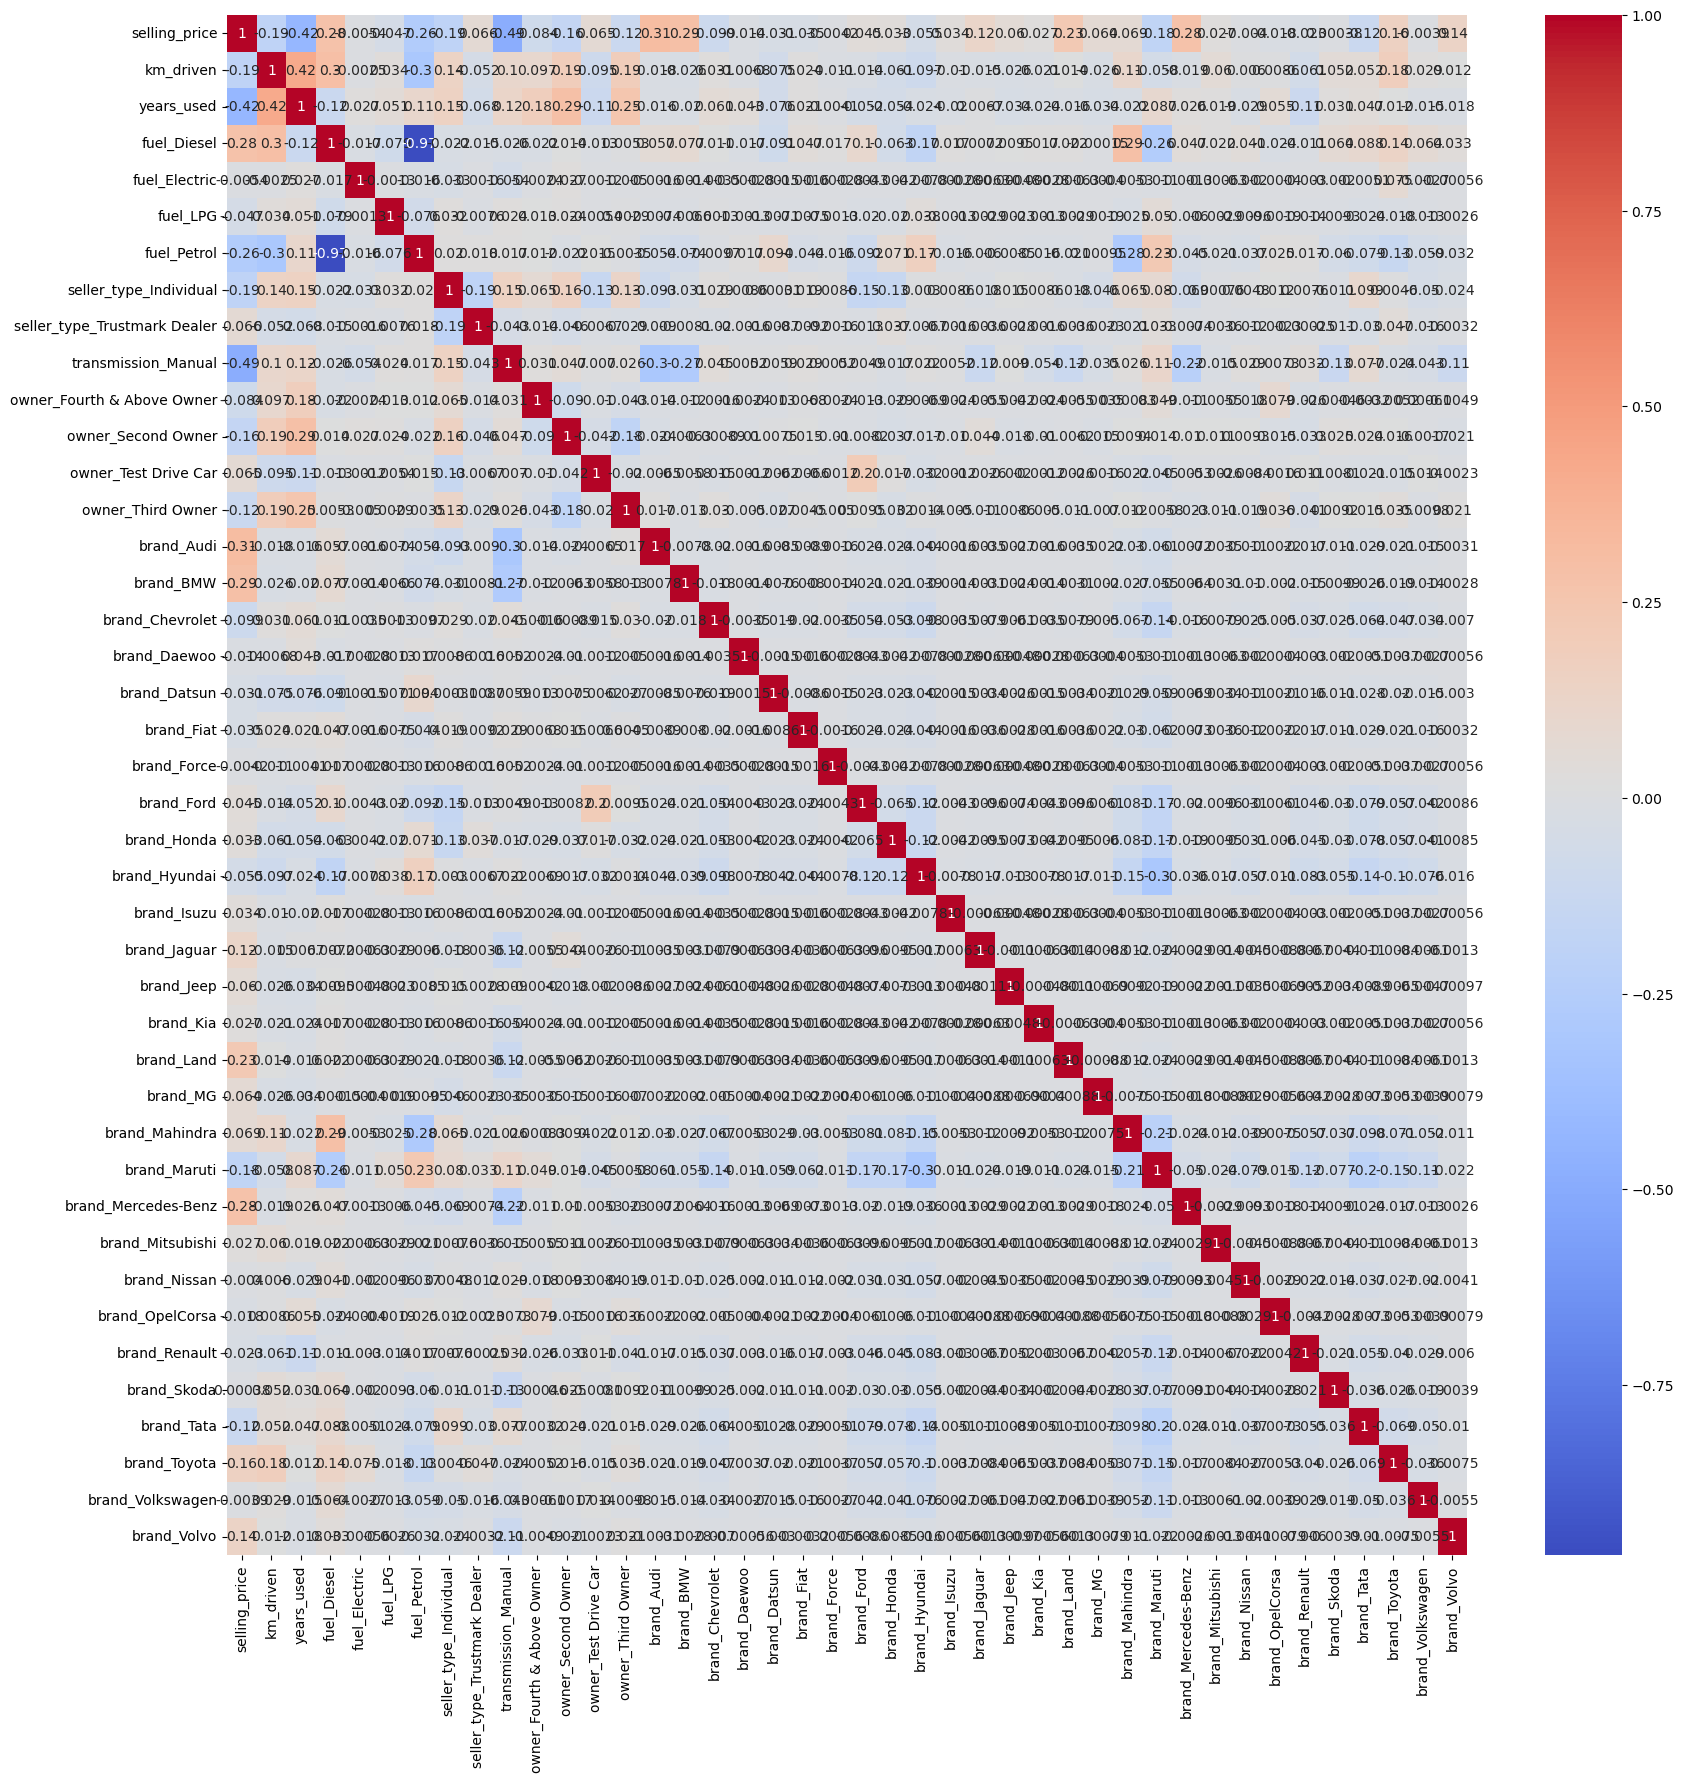

In [21]:
# Checking the correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = car_details.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.show()

In [22]:
#selecting features for segmentation
features = ["selling_price", "km_driven", "years_used", "fuel_Diesel", "fuel_Petrol", 
            "seller_type_Individual", "transmission_Manual", "owner_Fourth & Above Owner"]

In [23]:
#extracting the selected features
X = car_details[features]

In [24]:
#standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
#Elbow method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

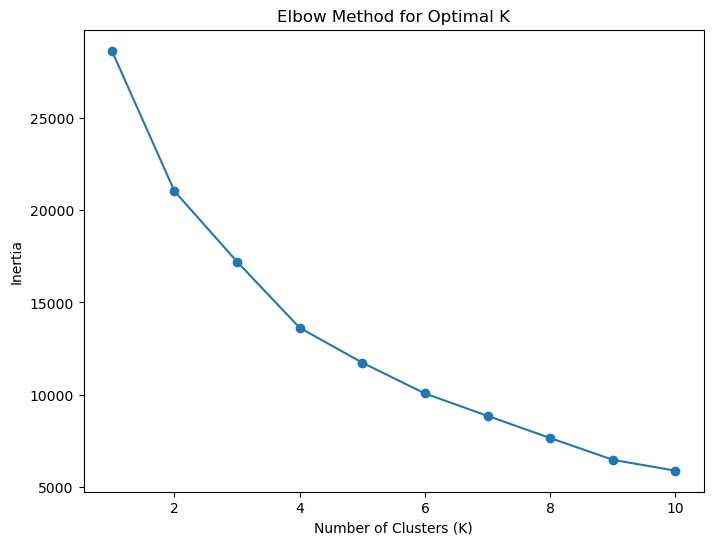

In [26]:
#plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker = "o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [27]:
#applying K-Means clustering
optimal_k = 4  # Choose the optimal number of clusters based on analysis
kmeans = KMeans(n_clusters=optimal_k, random_state = 42)
car_details["Segment"] = kmeans.fit_predict(X_scaled)

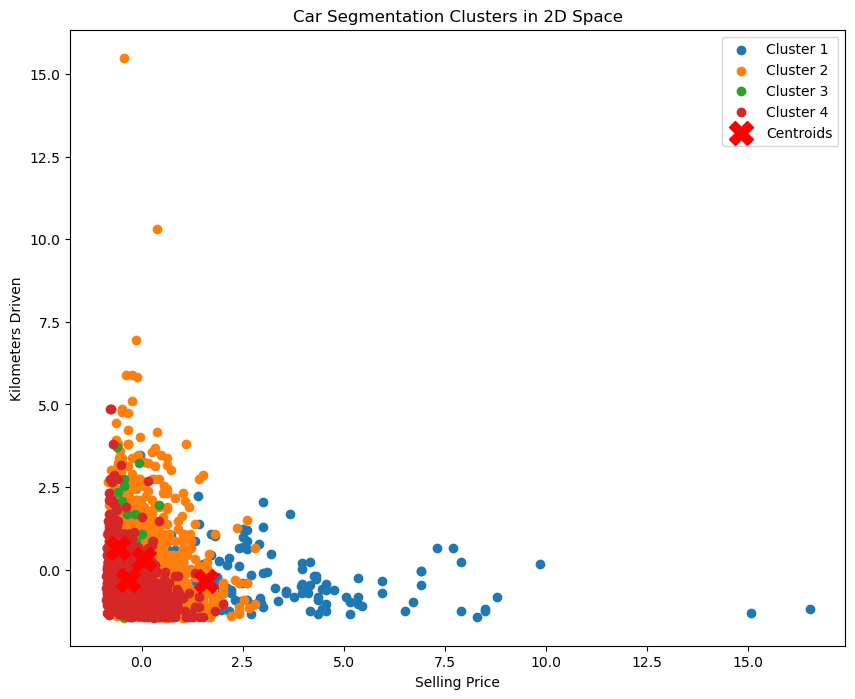

In [28]:
#visualize clusters in 2D space
plt.figure(figsize=(10, 8))

#scatter plot for each cluster
for cluster in range(optimal_k):
    cluster_data = X_scaled[car_details["Segment"] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label = f'Cluster {cluster + 1}')

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red", marker = "X", label = "Centroids")

plt.title("Car Segmentation Clusters in 2D Space")
plt.xlabel("Selling Price")
plt.ylabel("Kilometers Driven")
plt.legend()
plt.show()

In [29]:
#training the K-Means Clustering Model
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(X_scaled)

In [30]:
print(y)

[1 1 2 ... 1 2 3]


In [31]:
# Assuming you have the 'Segment' column in car_details DataFrame
car_details["Cluster"] = y

# Print the cluster assignments for each car
print(car_details[["selling_price", "km_driven", 'years_used', 'fuel_Diesel', 'fuel_Petrol', 
            'seller_type_Individual', 'transmission_Manual', 'owner_Fourth & Above Owner', "Cluster"]])


      selling_price  km_driven  years_used  fuel_Diesel  fuel_Petrol  \
0             60000      70000          17            0            1   
1            135000      50000          17            0            1   
2            600000     100000          12            1            0   
3            250000      46000           7            0            1   
4            450000     141000          10            1            0   
...             ...        ...         ...          ...          ...   
4335         409999      80000          10            1            0   
4336         409999      80000          10            1            0   
4337         110000      83000          15            0            1   
4338         865000      90000           8            1            0   
4339         225000      40000           8            0            1   

      seller_type_Individual  transmission_Manual  owner_Fourth & Above Owner  \
0                          1                    1     

In [32]:
#explore the characteristics of each segment
segment_stats = car_details.groupby("Segment").mean()

#characteristics of each segment
segment_stats

,selling_price,km_driven,years_used,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,Cluster
Segment,,,,,,,,,,,,,,,,,,,,,
0,1.284893e+06,53326.925566,9.323625,0.546926,0.003236,0.000000,0.449838,0.592233,0.022654,0.000000,...,0.003236,0.003236,0.000000,0.012945,0.061489,0.016181,0.064725,0.048544,0.012945,0.032362
1,5.025572e+05,85126.865182,10.588126,0.988868,0.000000,0.005566,0.000618,0.801484,0.006803,1.000000,...,0.002474,0.021645,0.000000,0.031540,0.014224,0.118738,0.076067,0.032777,0.000000,1.994434
2,1.812133e+05,100669.186667,16.320000,0.426667,0.000000,0.013333,0.520000,0.973333,0.000000,0.973333,...,0.000000,0.000000,0.013333,0.000000,0.013333,0.080000,0.040000,0.026667,0.000000,4.000000
3,2.994462e+05,54588.104061,11.583122,0.000000,0.000000,0.007614,0.975888,0.812183,0.009518,0.999365,...,0.000000,0.010152,0.000635,0.034898,0.003807,0.066624,0.015228,0.014594,0.000000,2.138959
